Team

---
1. Tarun Verma - 17HCS4142
2. Nitesh Kumar - 17HCS4125
3. Ricky Rajat Kerketta - 17HCS4162


---




#Fake News Detection

Fake news is a term that has been used to describe very different issues, from satirical articles to completely fabricated news and plain government propaganda in some outlets. Fake news, information bubbles, news manipulation and the lack of trust in the media are growing problems with huge ramifications in our society. However, in order to start addressing this problem, we need to have an understanding on what Fake News is. Only then can we look into the different techniques and fields of machine learning (ML), natural language processing (NLP) and artificial intelligence (AI) that could help us fight this situation.

##What is Fake News ?
“Fake news” has been used in a multitude of ways in the last half a year and multiple definitions have been given. For instance, the New York times defines it as “a made-up story with an intention to deceive”. This definition focuses on two dimensions: the intentionality (very difficult to prove) and the fact that the story is made up.

First Draft News, an organisation dedicated to improving skills and standards in the reporting and sharing of online information, has published a great article that explains the fake news environment and proposes 7 types of fake content:

1. False Connection: Headlines, visuals or captions don’t support the content
2. False Context: Genuine content is shared with false contextual information
3. Manipulated content: Genuine information or  imagery is manipulated
4. Satire or Parody: No intention to cause harm but potential to fool
5. Misleading Content: Misleading use of information to frame an issue/individual
6. Imposter Content: Impersonation of genuine sources
7. Fabricated content: New content that is 100% false

In this notebook, we'll build models to for classification of fake new dataset which is available in kaggle librabry.

In [0]:
import pandas as pd
import numpy as np
import itertools
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
import matplotlib.pyplot as plt

In [0]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Exploration

To begin, we should  take a quick look at the data and get to know its contents. To do so, use a Pandas DataFrame and check the shape, head and apply any necessary transformations.

<br>
DataSource: <br>
https://www.kaggle.com/rchitic17/real-or-fake<br>

In [0]:
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['fake_or_real_news.csv'].decode('utf-8')))

In [0]:
# from google.colab import drive
# drive.mount("/content/drive")
# df = pd.read_csv('/content/drive/My Drive/DataSets/fake_or_real_news.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df.shape

(6335, 4)

In [0]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [0]:
df = df.set_index('Unnamed: 0')

In [0]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Extracting the training data

In [0]:
y = df.label

In [0]:
df = df.drop('label', axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

### Building Vectorizer Classifiers

Now that we have our training and testing data, we can build your classifiers. To get a good idea if the words and tokens in the articles had a significant impact on whether the news was fake or real, we begin by using `CountVectorizer` and `TfidfVectorizer`.  

This has a max threshhold set at `.7` for the TF-IDF vectorizer `tfidf_vectorizer` using the `max_df` argument. This removes words which appear in more than 70% of the articles. Also, the built-in `stop_words` parameter will remove English stop words from the data before making vectors. 

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [0]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

Now that we have vectors, we can then take a look at the vector features, stored in `count_vectorizer` and `tfidf_vectorizer`. 


In [0]:
tfidf_vectorizer.get_feature_names()[-10:]

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']

In [0]:
count_vectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

#### Count versus TF-IDF Features


As we can see by running the cells below, both vectorizers extracted the same tokens, but obviously have different weights. Likely, changing the `max_df` and `min_df` of the TF-IDF vectorizer could alter the result and lead to different features in each.

In [0]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [0]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [0]:
set(count_df.columns).symmetric_difference(tfidf_df.columns)

set()

In [0]:
print(count_df.equals(tfidf_df))

False


In [0]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,001,0011,002,003,004,006,006s,007,007s,008,008s,009,0099,00am,00p,00pm,01,010,013,014,015,016,018,01am,02,020,022,023,024,025,...,שולטים,שזו,שטחים,שינוי,שיתעקש,שכל,שכמוני,של,שלו,שנדרש,שני,שעת,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,أن,إجلاء,الأمر,الجرحى,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,001,0011,002,003,004,006,006s,007,007s,008,008s,009,0099,00am,00p,00pm,01,010,013,014,015,016,018,01am,02,020,022,023,024,025,...,שולטים,שזו,שטחים,שינוי,שיתעקש,שכל,שכמוני,של,שלו,שנדרש,שני,שעת,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,أن,إجلاء,الأمر,الجرحى,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Comparing Models

In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
clf = MultinomialNB() 

accuracy:   0.8565279770444764
Confusion matrix, without normalization


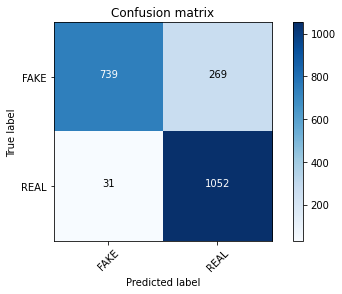

In [0]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  ", score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [0]:
clf = MultinomialNB() 

accuracy:    0.893352462936394
Confusion matrix, without normalization


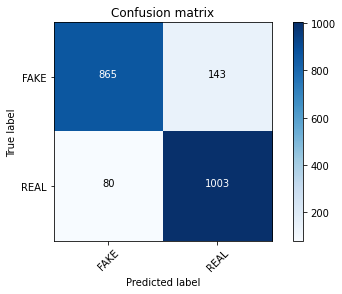

In [0]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   " ,score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

###Linear Model

In [0]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:    0.9363940698230512
Confusion matrix, without normalization


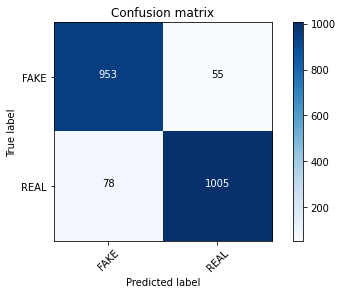

In [0]:
linear_clf.fit(tfiCreated using Colaboratorydf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   " , score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

####Testing MultinomialNB

In [0]:
clf = MultinomialNB(alpha=0.1)

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


### Introspecting models

It only works for binary classificaiton (classifiers with 2 classes), but that's good news for you, since you only have FAKE or REAL labels. 

Using your best performing classifier with your TF-IDF vector dataset (`tfidf_vectorizer`) and Passive Aggressive classifier (`linear_clf`), inspect the top 30 vectors for fake and real news:

In [0]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -5.000484429492955 2016
FAKE -4.35900816632204 october
FAKE -3.915589297183794 hillary
FAKE -3.288363515679931 share
FAKE -2.9244535694741693 article
FAKE -2.7603668841762796 print
FAKE -2.654944615736842 november
FAKE -2.5689366342867506 email
FAKE -2.4495579478731555 oct
FAKE -2.373866340167201 advertisement
FAKE -2.3114940390809657 source
FAKE -2.2035734734225287 war
FAKE -2.1613524715230454 podesta
FAKE -2.1262434259504563 nov
FAKE -2.1008203505202254 mosul
FAKE -2.076848052623877 26
FAKE -2.0492885383958837 corporate
FAKE -2.0278583450167105 establishment
FAKE -1.962588539411292 wikileaks
FAKE -1.9577058491318051 election
FAKE -1.7932731536653124 com
FAKE -1.7779972430644453 donald
FAKE -1.7708796084362197 snip
FAKE -1.7652719451476695 jewish
FAKE -1.7038468403574973 ayotte
FAKE -1.6998302634906743 brexit
FAKE -1.6658922438057324 rt
FAKE -1.6634100426537206 pipeline
FAKE -1.6391897182718747 pm
FAKE -1.6331802361147914 healthcare

REAL 4.816760310190688 said
REAL 2.71689610310

Alternatively

In [0]:
feature_names = tfidf_vectorizer.get_feature_names()

In [0]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.257361214701583, 'trump'),
 (-6.494453094312678, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.037944662867073, 'obama'),
 (-7.146539983381228, 'sanders'),
 (-7.215376008647511, 'president'),
 (-7.266562805741618, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.341118458599064, 'state'),
 (-7.341357110247905, 'cruz'),
 (-7.378312441985425, 'party'),
 (-7.44688067245789, 'new'),
 (-7.476288801154588, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.580150633909893, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.634478172520314, 'voters'),
 (-7.648482443695299, 'rubio'),
 (-7.6734836186463795, 'states')]

In [0]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

In [0]:
tokens_with_weights = sorted(list(zip(feature_names, clf.coef_[0])))
tokens_with_weights

[('00', -10.857116998506546),
 ('000', -8.492817058531777),
 ('0000', -11.349866225220305),
 ('00000031', -11.281648103237613),
 ('000035', -11.349866225220305),
 ('00006', -11.26030410950723),
 ('0001', -11.349866225220305),
 ('0001pt', -11.349866225220305),
 ('000ft', -10.997423118951112),
 ('000km', -11.349866225220305),
 ('001', -11.150294151197263),
 ('0011', -11.349866225220305),
 ('002', -11.228506379006314),
 ('003', -11.172466924188384),
 ('004', -11.164091627418959),
 ('006', -11.321856249673262),
 ('006s', -11.349866225220305),
 ('007', -11.349866225220305),
 ('007s', -11.349866225220305),
 ('008', -11.244951152773748),
 ('008s', -11.349866225220305),
 ('009', -11.264895105758017),
 ('0099', -11.349866225220305),
 ('00am', -11.349866225220305),
 ('00p', -11.349866225220305),
 ('00pm', -11.349866225220305),
 ('01', -11.233784603690763),
 ('010', -11.304499173299146),
 ('013', -11.290063381385576),
 ('014', -11.349866225220305),
 ('015', -11.349866225220305),
 ('016', -11.2953

## Conclusion
<br><h4>
Our accuracies for the models are as follows.</h4> <br>



* MultinomialNB  - 89.33%<br>
* Linear Model - 93.63%<br>

<br><br>


Thank You!